In [50]:
%matplotlib inline

In [45]:
# Import necessary libraries
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from torchvision.transforms import functional as F
from pathlib import Path
from models.experimental import attempt_load
from utils.general import non_max_suppression, scale_coords

# Define helper functions
def preprocess_image(image_path, img_size=640):
    """
    Preprocess the image for YOLOv7 input.
    """
    img = cv2.imread(image_path)  # Read the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (img_size, img_size))  # Resize to 640x640 (YOLO input size)
    img = img / 255.0  # Normalize to 0-1
    img = np.transpose(img, (2, 0, 1))  # Change shape to (C, H, W)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = torch.from_numpy(img).float()  # Convert to torch tensor
    return img

def draw_bounding_boxes(image, detections):
    """
    Draw bounding boxes on the original image.
    """
    for *xyxy, conf, cls in detections:
        x1, y1, x2, y2 = map(int, xyxy)  # Get coordinates
        label = f"Skin Cancer {conf:.2f}"  # Add confidence to label
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  # Add label text
    return image

# Load the YOLOv7 model
weights_path = r"C:\MSAAI\AAI-521\Final Project Data\YOLO Model Data\best.pt"  # Path to your trained weights
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Attempt to load the YOLO model
model = attempt_load(weights_path, map_location=device)
model.to(device)
model.eval()  # Set to evaluation mode

# Load and preprocess the image
image_path = r"C:\MSAAI\AAI-521\Final Project Data\image_for_model_showcase.png"
original_image = cv2.imread(image_path)  # Read the original image
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB
showcase_image = preprocess_image(image_path).to(device)  # Preprocess and move to device

# Run inference
with torch.no_grad():  # Disable gradient calculation for inference
    pred = model(showcase_image)[0]  # Get raw predictions

# Apply non-maximum suppression (NMS)
detections = non_max_suppression(pred, conf_thres=0.25, iou_thres=0.45)[0]

if detections is not None:
    # Scale coordinates back to the original image size
    detections[:, :4] = scale_coords(showcase_image.shape[2:], detections[:, :4], original_image.shape[:2]).round()

    # Draw bounding boxes on the original image
    bound_image = draw_bounding_boxes(original_image_rgb, detections)

    # Display the result
    plt.figure(figsize=(10, 10))
    plt.imshow(bound_image)
    plt.axis("off")
    plt.show()

    # Save the image with bounding boxes
    output_path = r"C:\MSAAI\AAI-521\Final Project Data\image_with_bounding_box.png"
    cv2.imwrite(output_path, cv2.cvtColor(bound_image, cv2.COLOR_RGB2BGR))  # Convert back to BGR before saving
    print(f"Image saved at {output_path}")
else:
    print("No detections found.")


C:\Users\gabri\yolov7\models\experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(w, map_location=map_location)  # load


Fusing layers... 


Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS


RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Image saved at C:\MSAAI\AAI-521\Final Project Data\image_with_bounding_box.png


C:\Users\gabri\AppData\Local\Temp\ipykernel_486500\1508595487.py:71: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


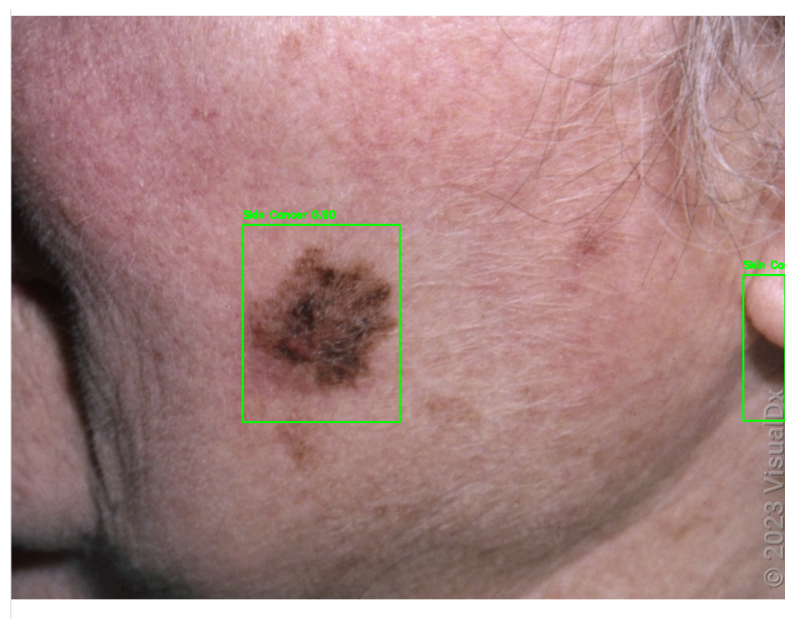

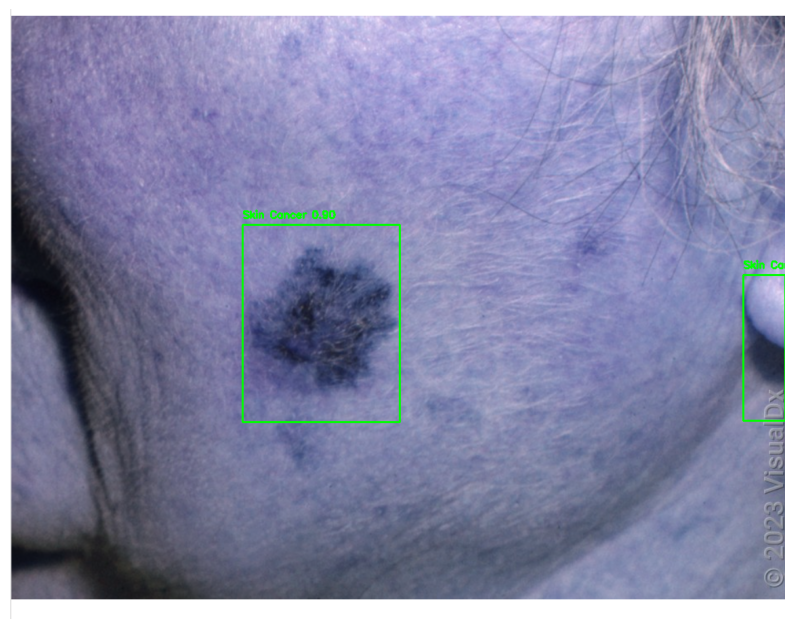

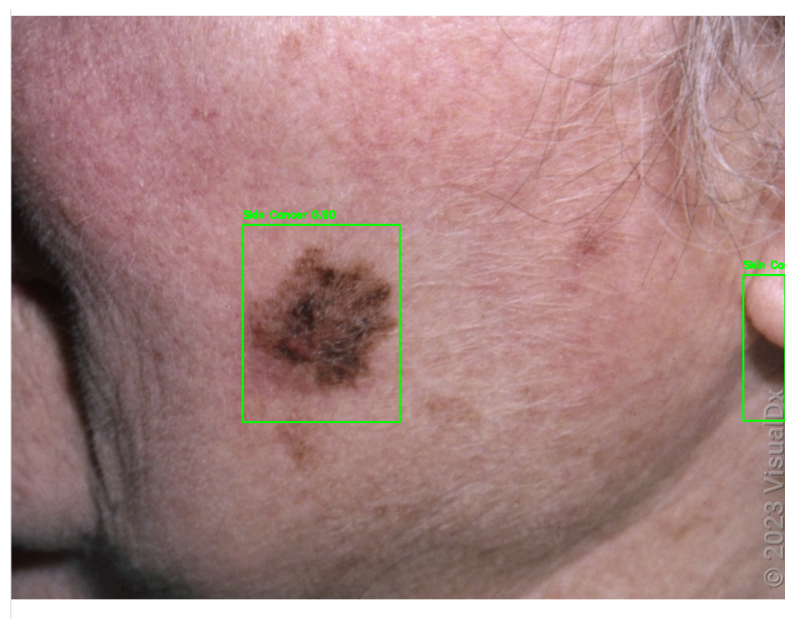

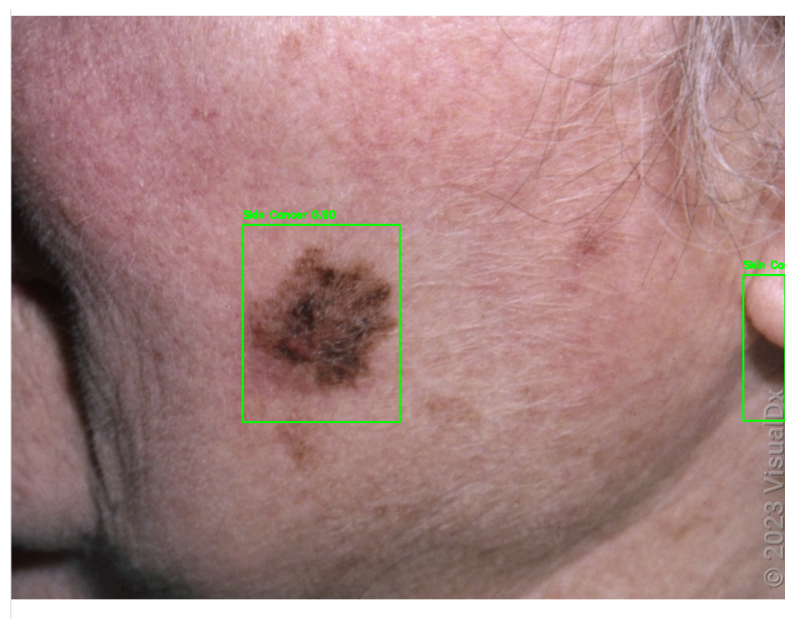

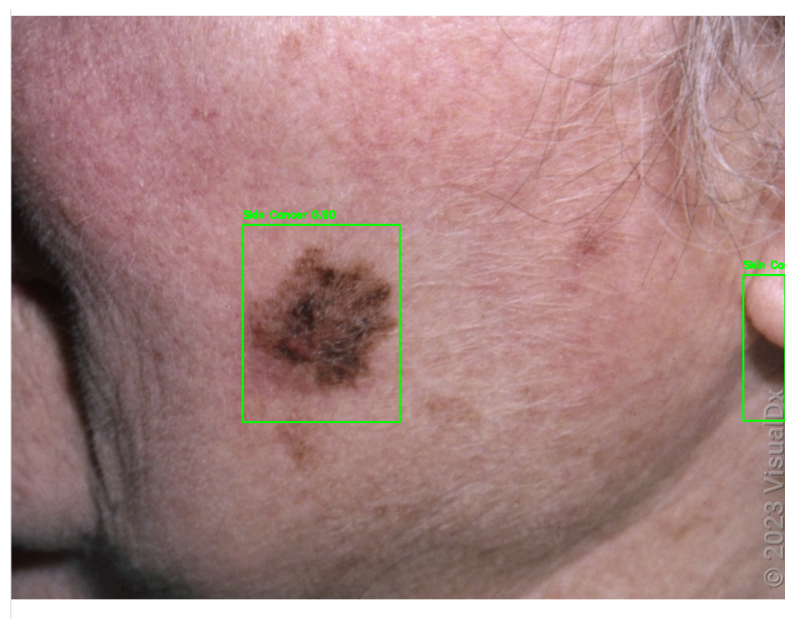

In [51]:
# Load the image with bounding box
bb_image = cv2.imread(r"C:\MSAAI\AAI-521\Final Project Data\image_with_bounding_box.png")

# Convert BGR to RGB for correct display
bb_image_rgb = cv2.cvtColor(bb_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(bb_image_rgb)
plt.axis("off")
plt.show()